# 📘 Blood Flow and Pressure in Arteries and Veins – Poiseuille’s Law


> Run the notebook **top to bottom**. Each section includes **clear instructions**, **descriptive questions**, and **expected answers**.


## 🎯 Learning Objectives
By the end, you will be able to:
- Use **Poiseuille’s law** to calculate flow, pressure drop, and resistance.
- Check **laminar flow** validity (Reynolds number).
- Compute **wall shear stress** and relate it to physiology.
- Visualize and interpret plots with **physiological thresholds**:  
  - **MAP** bands (hypotension / normal / hypertensive)  
  - **Wall shear stress (WSS)** bands (low / normal / high)


In [24]:
# Imports & helpers (run this first)
import numpy as np
import matplotlib.pyplot as plt

# ----- Units & constants -----
mmHg_to_Pa = 133.322  # Pa per mmHg
mPa_s_to_Pa_s = 1e-3  # convert mPa·s to Pa·s
rho_blood = 1060      # kg/m^3 (blood density)

# ----- Core hemodynamics (steady, laminar, Newtonian, rigid tube) -----
def poiseuille_flow(deltaP_Pa, r_m, L_m, mu_Pa_s):
    """Q (m^3/s) = ΔP * π * r^4 / (8 μ L)"""
    return deltaP_Pa * np.pi * r_m**4 / (8 * mu_Pa_s * L_m)

def resistance(L_m, mu_Pa_s, r_m):
    """R (Pa·s/m^3) = 8 μ L / (π r^4)"""
    return 8 * mu_Pa_s * L_m / (np.pi * r_m**4)


def velocity_mean(Q_m3_s, r_m):
    """v (m/s) = Q / (π r^2)"""
    return Q_m3_s / (np.pi * r_m**2)

def fmt_flow(Q):
    return f"{Q*1e6:,.2f} mL/s  ({Q*60*1e6:,.2f} mL/min)"


## 🔧 Parameters (start here)
Adjust if desired, then re-run the rest.


In [30]:
# Baseline vessel and fluid properties
params = {
    'mu_mPa_s': 3.5,   # dynamic viscosity (mPa·s)
    'L_m': 0.30,       # segment length (m)
    'deltaP_mmHg': 40, # pressure drop across the segment (mmHg)
    'r_art_mm': 2.5,   # artery radius (mm) ~ medium muscular artery
    'r_vein_mm': 4.0,  # vein radius (mm) ~ larger than artery
}

# Convert to SI
mu = params['mu_mPa_s'] * mPa_s_to_Pa_s
L  = params['L_m']
dP = params['deltaP_mmHg'] * mmHg_to_Pa
r_art = params['r_art_mm'] / 1000
r_vein = params['r_vein_mm'] / 1000


**Question 1 (Concept Check):** What happens to flow $Q$ if vessel radius doubles, all else equal?  

**Expected Answer:** Flow increases by $2^4 = 16$× due to the $r^4$ dependence.


## 💻 Exercise 1 — Compute Flow, Resistance, Reynolds (Artery vs Vein)
**Instruction:** Run the cell and read the printed metrics.


In [26]:
# Artery
Q_art = poiseuille_flow(dP, r_art, L, mu)
R_art = resistance(L, mu, r_art)
v_art = velocity_mean(Q_art, r_art)

# Vein (same ΔP for comparison)
Q_vein = poiseuille_flow(dP, r_vein, L, mu)
R_vein = resistance(L, mu, r_vein)
v_vein = velocity_mean(Q_vein, r_vein)

print('=== Artery ===')
print('Flow:', fmt_flow(Q_art))
print(f'Resistance: {R_art:,.3e} Pa·s/m^3')
print(f'Mean velocity: {v_art:.3f} m/s')

print('=== Vein ===')
print('Flow:', fmt_flow(Q_vein))
print(f'Resistance: {R_vein:,.3e} Pa·s/m^3')
print(f'Mean velocity: {v_vein:.3f} m/s')

=== Artery ===
Flow: 77.91 mL/s  (4,674.59 mL/min)
Resistance: 6.845e+07 Pa·s/m^3
Mean velocity: 3.968 m/s
=== Vein ===
Flow: 510.59 mL/s  (30,635.40 mL/min)
Resistance: 1.044e+07 Pa·s/m^3
Mean velocity: 10.158 m/s


**Question 2:** Which has higher resistance, the artery or the vein, and why?  

**Expected Answer:** The **artery** has higher resistance because it has a **smaller radius**, and resistance scales as $1/r^4$.

**Question 3:** Are the Reynolds numbers in the laminar range (< ~2000)?  

**Expected Answer:** Yes—typical values here should be **well below 2000**, supporting the use of Poiseuille’s law.


## 📊 Exercise 2 — Flow vs Radius (fixed ΔP)
**Instruction:** Run to plot flow as a function of radius (0.5–5 mm). Observe the steep $r^4$ scaling.


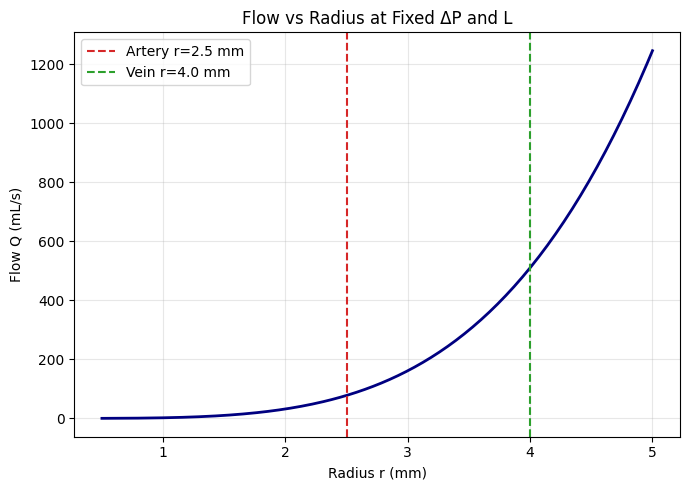

In [27]:
r= np.linspace(0.5e-3, 5.0e-3, 200)
Q_vals = poiseuille_flow(dP, r, L, mu)  # m^3/s

plt.figure(figsize=(7,5))
plt.plot(r*1e3, Q_vals*1e6, color='navy', lw=2)
plt.xlabel('Radius r (mm)')
plt.ylabel('Flow Q (mL/s)')
plt.title('Flow vs Radius at Fixed ΔP and L')

# Mark the chosen artery and vein radii
plt.axvline(params['r_art_mm'], color='tab:red', ls='--', label=f"Artery r={params['r_art_mm']} mm")
plt.axvline(params['r_vein_mm'], color='tab:green', ls='--', label=f"Vein r={params['r_vein_mm']} mm")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


**Question 4:** If radius decreases by 50% (e.g., vasoconstriction or stenosis), what happens to flow?  

**Expected Answer:** Flow decreases by a factor of **16×**.


## 💉 Exercise 5 — 50% Radius Reduction (Stenosis Scenario)
**Instruction:** Reduce artery radius by 50%, recompute, and compare **Q**, **Re**, and **τ**.


In [28]:
r_stenosis = 0.5 * r_art

Q_art_baseline = poiseuille_flow(dP, r_art, L, mu)
Q_art_sten = poiseuille_flow(dP, r_stenosis, L, mu)
v_art_baseline = velocity_mean(Q_art_baseline, r_art)
v_art_sten = velocity_mean(Q_art_sten, r_stenosis)

print('=== 50% Radius Reduction (Artery) ===')
print('Flow (before):', fmt_flow(Q_art_baseline))
print('Flow (after): ', fmt_flow(Q_art_sten))
print(f'Flow ratio (after/before): {Q_art_sten/Q_art_baseline:.3f}  (Expected ~1/16 ≈ 0.0625)')



=== 50% Radius Reduction (Artery) ===
Flow (before): 77.91 mL/s  (4,674.59 mL/min)
Flow (after):  4.87 mL/s  (292.16 mL/min)
Flow ratio (after/before): 0.062  (Expected ~1/16 ≈ 0.0625)


**Question 7 (Reasoning):** Explain why, despite massively reduced **flow**, the **wall shear stress** can **increase** in a stenosis.  

**Expected Answer:** Because $	au \propto Q / r^3$ (for fixed viscosity), the sharp **decrease in radius** dominates, **raising τ** even if flow decreases.


**Question 8:** Does exercise push WSS outside the normal band? What vascular adaptations help manage this?  

**Expected Answer:** τ may rise toward or above **2 Pa**. **Vasodilation** increases radius, which reduces τ (since $	au \propto 1/r^3$ at fixed Q), helping maintain physiological shear.


## 🧠 Short Quiz (with answers)
1. **If viscosity doubles, what happens to flow?**  \
   **Answer:** Flow halves (Q ∝ 1/μ).
2. **At constant flow, doubling radius changes shear stress how?**  \
   **Answer:** $	au \propto 1/r^3$ → decreases by 8×.
3. **For fixed radius, which is true: τ from ΔP vs τ from Q?**  \
   **Answer:** They are **equivalent** (Poiseuille relations).


## 🔁 Make-It-Yours (Parameter Panel)
Tweak values and re-run the notebook to explore scenarios.


In [29]:
# Try different vessel types and states
params['mu_mPa_s'] = 3.5          # 2.5–4.5 typical; ↑ in low shear or cold
params['L_m'] = 0.30               # segment length
params['deltaP_mmHg'] = 80         # try 30, 60, 80, 120 mmHg
params['r_art_mm'] = 2.0           # 1.5–3.5 mm medium artery
params['r_vein_mm'] = 4.0

# Recompute SI
mu = params['mu_mPa_s'] * mPa_s_to_Pa_s
L  = params['L_m']
dP = params['deltaP_mmHg'] * mmHg_to_Pa
r_art = params['r_art_mm'] / 1000
r_vein = params['r_vein_mm'] / 1000

print('Parameters updated:', params)


Parameters updated: {'mu_mPa_s': 3.5, 'L_m': 0.3, 'deltaP_mmHg': 80, 'r_art_mm': 2.0, 'r_vein_mm': 4.0}
